In [2]:
import pandas as pd

data = pd.read_csv('../../data/processed/import_declarations_intermax_daily.csv')


data.set_index('Date', inplace=True)
data.head()

,Abgabe
Date,
2017-01-02,439.79
2017-01-03,2107.94
2017-01-04,215.37
2017-01-05,0.00
2017-01-06,0.00


In [25]:
from statsmodels.tsa.api import ExponentialSmoothing


model = ExponentialSmoothing(data, trend="add", seasonal="add").fit()

model.summary()

/home/stefaneissler/customsfee_forecasting/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/stefaneissler/customsfee_forecasting/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Abgabe,No. Observations:,1045
Model:,ExponentialSmoothing,SSE,6619929417.369
Optimized:,True,AIC,16388.349
Trend:,Additive,BIC,16442.819
Seasonal:,Additive,AICC,16388.702
Seasonal Periods:,7,Date:,"Mon, 18 Mar 2024"
Box-Cox:,False,Time:,14:02:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0025000,beta,True


In [31]:
predictions = model.predict(start=data.index[0], end=data.index[-1])

print(predictions)

2017-01-02     448.053416
2017-01-03     538.071387
2017-01-04      17.199642
2017-01-05     584.026168
2017-01-06      64.613340
                 ...     
2019-11-08    1705.004850
2019-11-09     514.690470
2019-11-10     258.631144
2019-11-11    4812.672107
2019-11-12    2019.311620
Freq: D, Length: 1045, dtype: float64


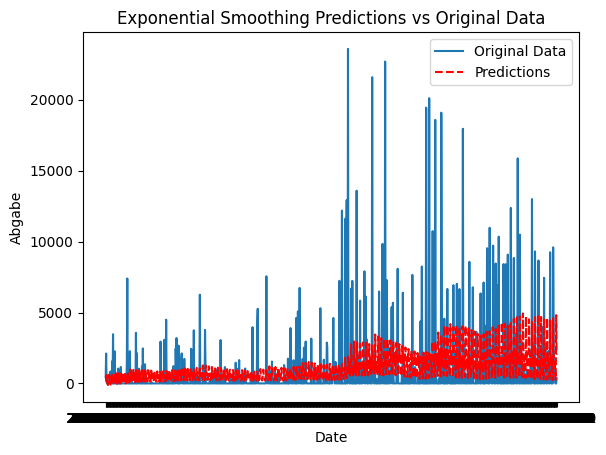

In [34]:
import matplotlib.pyplot as plt

plt.plot(data.index, data.Abgabe, label='Original Data')
plt.plot(data.index, predictions, label='Predictions', color='red', linestyle='--')
plt.title('Exponential Smoothing Predictions vs Original Data')
plt.xlabel('Date')
plt.ylabel('Abgabe')
plt.legend()
plt.show()